In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
pd.set_option('display.max_colwidth', None)  # Wyświetlanie pełnych wartości kolumn
pd.set_option('display.max_rows', None)      # Wyświetlanie wszystkich wierszy
pd.set_option('display.max_columns', None)

In [57]:
df = pd.read_excel('cyberbullying_train_complete_sentences.xlsx', sheet_name='Superanotator')[:199]

In [58]:
df_superanotator = df[['text','LABEL']]
df = df[['text', 'label1', 'label2', 'label3']]
df_part1 = df[:100]
df_part2 = df[101:]

In [50]:
import pandas as pd

def diff_label(df):
    df.loc[:, 'different_labels'] = (df['label1'] != df['label2']) | (df['label2'] != df['label3']) | (df['label1'] != df['label3'])

    difficult_cases = df['different_labels'].sum()

    total_cases = len(df)
    percentage_difficult = (difficult_cases / total_cases) * 100

    print(f"Liczba fragmentów z różnymi etykietami: {difficult_cases}")
    print(f"Procent fragmentów z różnymi etykietami: {percentage_difficult:.2f}%")

    difficult_texts = df[df['different_labels']]
    
    print("Fragmenty tekstu z różnymi etykietami przez anotatorów:")
    
    print(difficult_texts[['text', 'label1', 'label2', 'label3']])


In [51]:
diff_label(df_part1)

Liczba fragmentów z różnymi etykietami: 16
Procent fragmentów z różnymi etykietami: 16.00%
Fragmenty tekstu z różnymi etykietami przez anotatorów:
                                                                                                                                      text  \
2            @anonymized_account @anonymized_account Super, polski premier składa kwiaty na grobach kolaborantów. Ale doczekaliśmy czasów.   
7                                                                            @anonymized_account Dawno kogoś tak wrednego nie widziałam xd   
13                       @anonymized_account Oprawa do Krzysia M. Ps Pinokio -\n\" mogłeś być gangsterem a zostałeś 3 ligowym frajerem \"😀   
15                         @anonymized_account Mówi człowiek, który chciał nałożyć sankcje na Polskę. Gratulacje. #Niepodlegla #11lisopada   
16  RT @anonymized_account @anonymized_account Mówi człowiek, który chciał nałożyć sankcje na Polskę. Gratulacje. #Niepodlegla #11lisopada   
2

/tmp/ipykernel_19642/58864248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'different_labels'] = (df['label1'] != df['label2']) | (df['label2'] != df['label3']) | (df['label1'] != df['label3'])


In [52]:
diff_label(df_part2)

Liczba fragmentów z różnymi etykietami: 10
Procent fragmentów z różnymi etykietami: 10.20%
Fragmenty tekstu z różnymi etykietami przez anotatorów:
                                                                                                                                                                 text  \
136                                             Zdrady stanu to Donald Tusk dopuścił się już w 2010 r kiedy dodał Rosjanom śledztwo w sprawie katastrofy smoleńskiej.   
153                                                                 @anonymized_account Żal ci biedaku??? Gdyby nie Kaczyński to by je twoi przyjaciele z PO rozkradl   
154                                          RT @anonymized_account @anonymized_account Żal ci biedaku??? Gdyby nie Kaczyński to by je twoi przyjaciele z PO rozkradl   
156                                                                                      Sekta kurwa, jakaś niepojęta radość, każde konto pisdzielskie tylko o jednym   
164  @an

/tmp/ipykernel_19642/58864248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'different_labels'] = (df['label1'] != df['label2']) | (df['label2'] != df['label3']) | (df['label1'] != df['label3'])


In [59]:
label_counts = df_superanotator['LABEL'].value_counts()

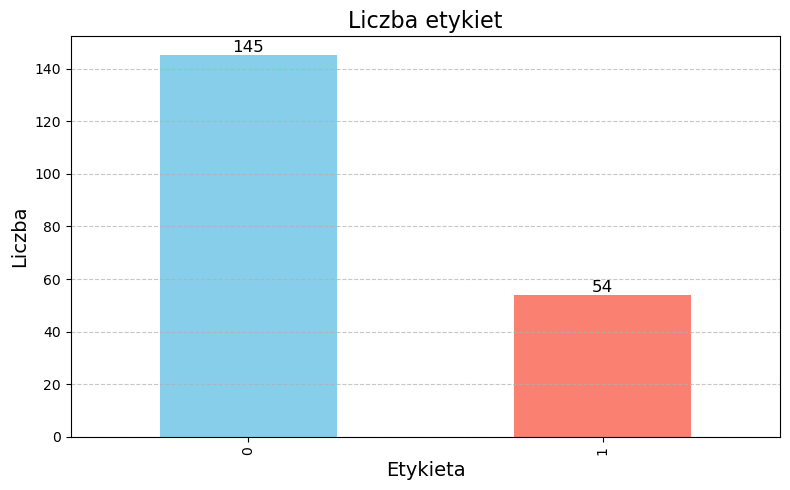

In [62]:

plt.figure(figsize=(8, 5))  
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Liczba etykiet', fontsize=16)
plt.xlabel('Etykieta', fontsize=14)
plt.ylabel('Liczba', fontsize=14)


for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(ticks=[0, 1], labels=['0', '1'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [63]:


length_in_characters = df['text'].str.len()

length_in_words = df['text'].str.split().str.len()

average_length_characters = length_in_characters.mean()
average_length_words = length_in_words.mean()

print(f"Średnia długość tekstu w pojedynczym wierszu (znaki): {average_length_characters:.2f}")
print(f"Średnia długość tekstu w pojedynczym wierszu (słowa): {average_length_words:.2f}")


Średnia długość tekstu w pojedynczym wierszu (znaki): 92.37
Średnia długość tekstu w pojedynczym wierszu (słowa): 12.29


In [64]:
all_text = " ".join(df['text'])

unique_words = set(all_text.split())

number_of_unique_words = len(unique_words)

print(f"Liczba różnych słów w kolumnie 'text': {number_of_unique_words}")


Liczba różnych słów w kolumnie 'text': 1270
